In [1]:
import numpy as np
import pandas as pd

import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

### 1. KMeans for circular dataset

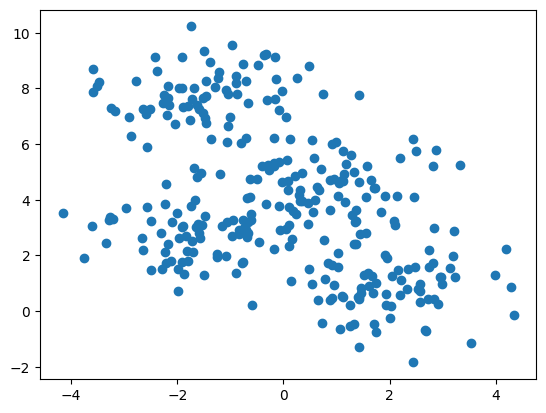

In [5]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.99, random_state=0)
plt.scatter(X[:, 0], X[:, 1]);

In [15]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

c:\Users\srikanth\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [8]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]
[1 2 0 2 1 1 3 0 2 2 3 2 0 2 1 0 0 1 3 3 1 1 0 3 3 0 1 0 3 0 2 2 0 2 2 2 2
 2 3 1 0 3 0 0 3 3 2 3 2 1 3 1 2 1 1 3 2 3 2 1 2 0 2 3 3 3 2 1 2 3 0 3 2 3
 3 2 3 0 1 2 1 0 1 1 2 0 1 0 2 2 0 1 2 3 3 0 1 1 0 3 2 1 2 1 0 1 1 0 2 0 3
 3 1 2 1 0 2 1 1 0 3 1 3 1 1 1 1 3 1 3 2 3 3 1 2 3 3 2 0 2 2 3 0 3 0 3 2 0
 2 2 2 0 2 0 1 3 2 3 1 0 2 0 0 1 0 3 3 0 1 0 0 2 1 0 3 2 1 1 0 3 1 0 3 3 0
 0 0 0 1 2 0 3 0 0 3 3 3 0 3 2 0 3 1 3 0 2 3 2 0 2 0 3 0 0 2 3 3 1 1 0 2 1
 1 3 1 3 0 2 2 0 0 2 0 1 3 0 1 3 2 3 1 0 1 2 2 2 2 3 3 2 0 3 1 0 3 3 3 1 1
 2 0 0 3 1 2 3 0 2 0 1 1 3 3 0 1 1 1 0 2 2 1 1 0 1 1 1 2 3 2 0 1 1 2 2 2 1
 1 0 2 3]


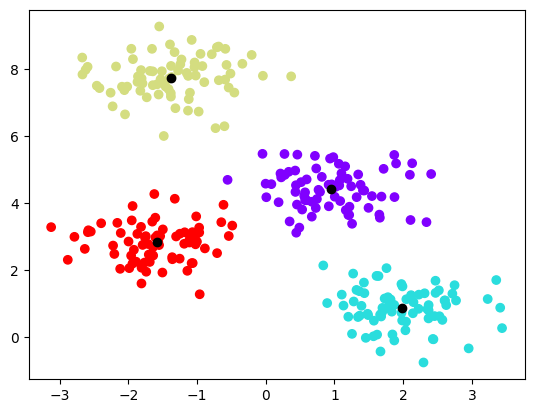

In [9]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

c:\Users\srikanth\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\srikanth\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\srikanth\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\srikanth\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

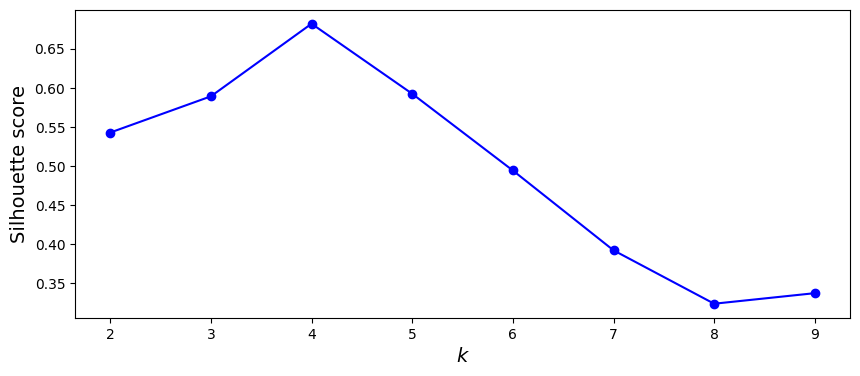

In [29]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(10, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

### Decision Boundaries

In [30]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=5)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

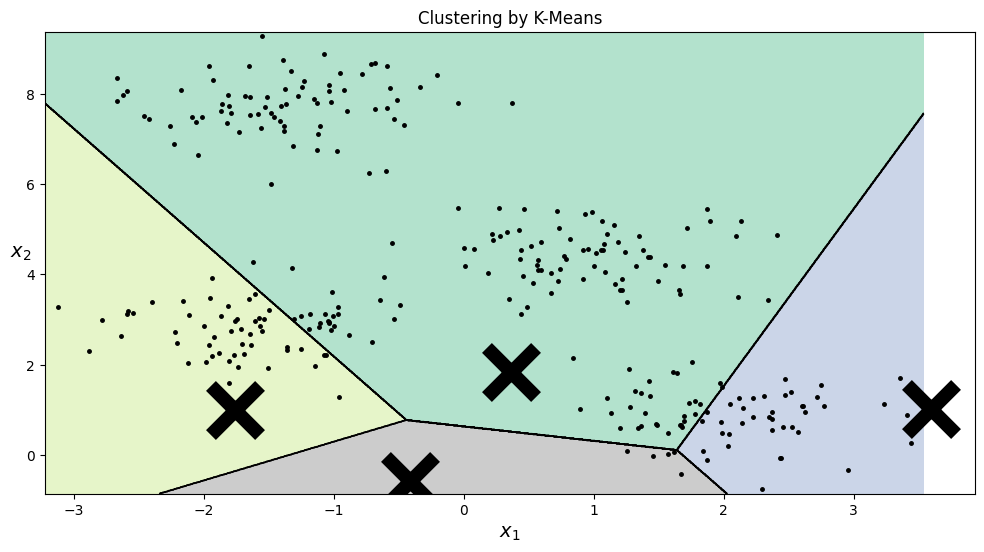

In [31]:
plt.figure(figsize=(12, 6))
plt.title("Clustering by K-Means")
plot_decision_boundaries(kmeans, X)
plt.show()

### 2. KMeans on oblong clusters

C:\Users\srikanth\AppData\Local\Temp\ipykernel_29408\3823662884.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=None, s=2, cmap='autumn')


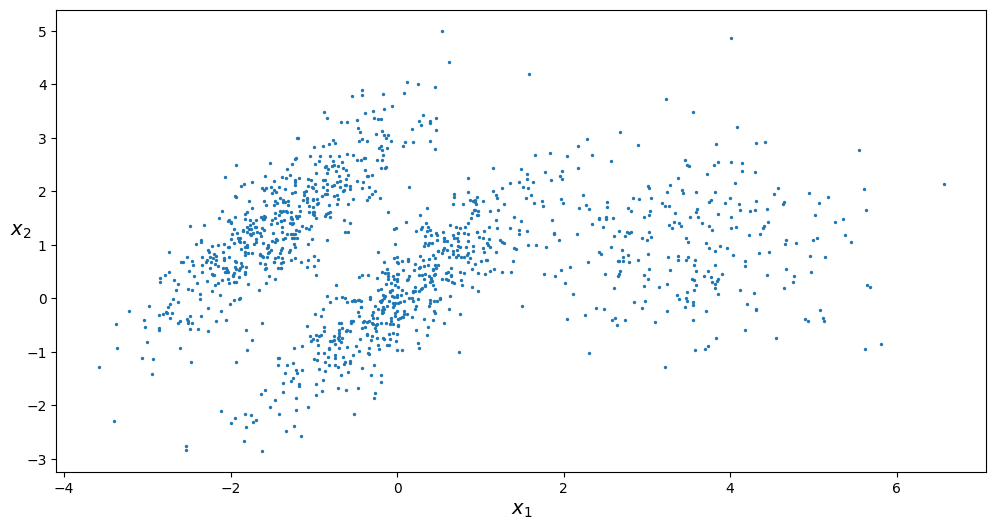

In [23]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]


plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=None, s=2, cmap='autumn')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()

c:\Users\srikanth\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\srikanth\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\srikanth\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\srikanth\anaconda3\envs\quickstart\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

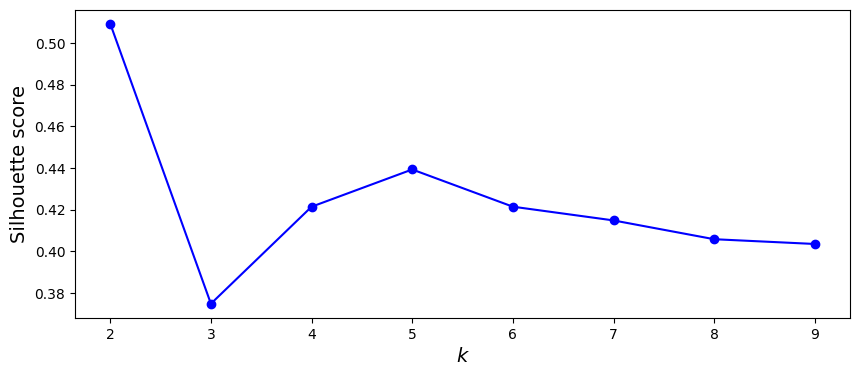

In [24]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(10, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

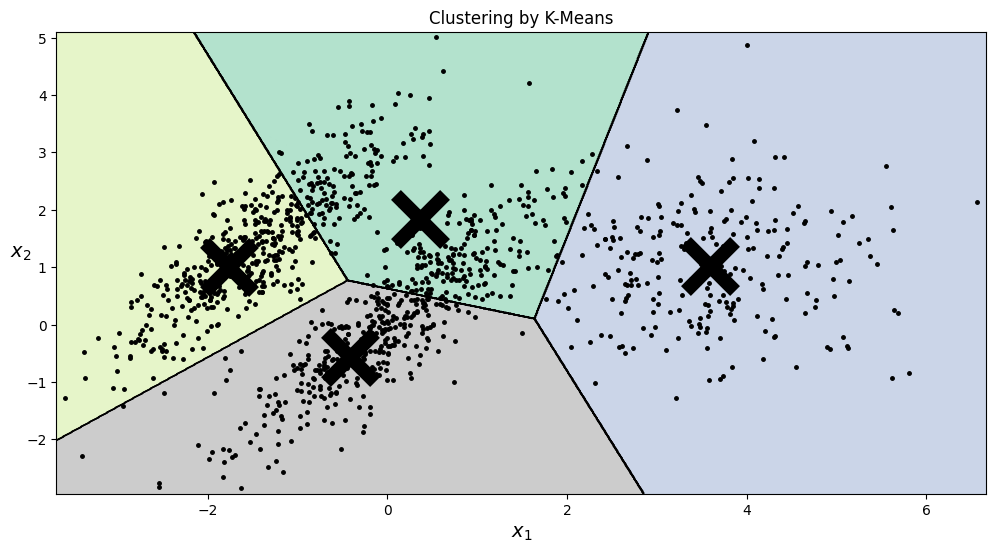

In [25]:
plt.figure(figsize=(12, 6))
plt.title("Clustering by K-Means")
plot_decision_boundaries(kmeans, X)
plt.show()

### Gaussian Mixture Model

In [26]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

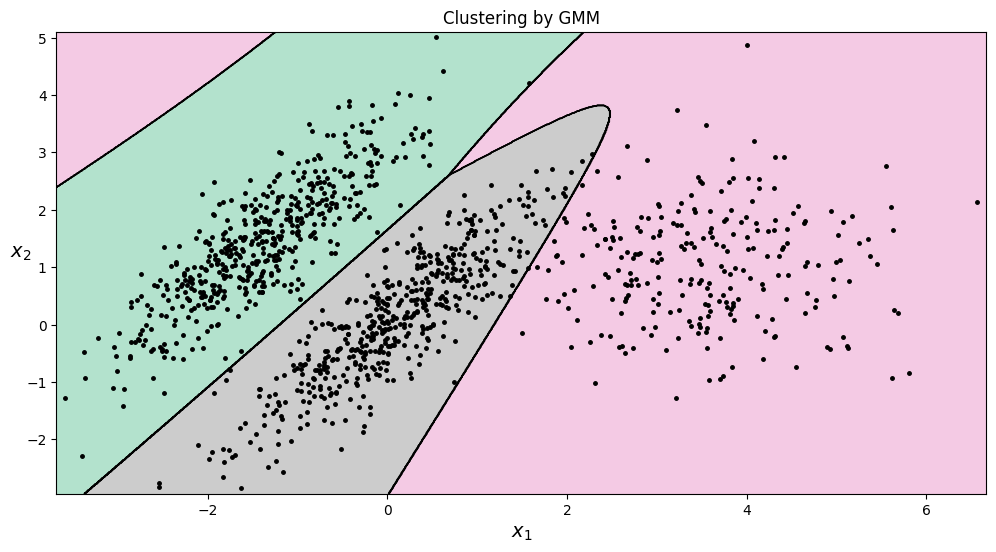

In [27]:
plt.figure(figsize=(12, 6))
plt.title("Clustering by GMM")
plot_decision_boundaries(gm, X, show_centroids=False)
plt.show()

### 3. KMeans on clusters with different standard deviation

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

X_new, y_true_new = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.90, random_state=0)
#c=kmeans.labels_, cmap='rainbow'
#plt.scatter(X[:, 0], X[:, 1]);
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(12, 6))
axes[0].scatter(X[:, 0], X[:, 1]);
axes[1].scatter(X_new[:, 0], X_new[:, 1]);


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

In [ ]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

In [ ]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [ ]:
rng = np.random.RandomState(42)

In [ ]:
i = rng.permutation(X.shape[0])[:4]
i

In [ ]:
centers = X[i]

In [ ]:
from sklearn.metrics import pairwise_distances, pairwise_distances_argmin

In [ ]:
labels = pairwise_distances_argmin(X, centers)
labels

In [ ]:
pairwise_distances(X, centers)

In [ ]:
np.argmin(pairwise_distances(X, centers), axis=1)

In [ ]:
def choice():
    pass

In [ ]:
def NewSearch(A, key): # Search in O(1)
    j = choice() # -------> O(1)
    if key == A[j]:
        # key found, return j
        return j
    else:
        # key not found, return -1
        return -1

In [ ]:
X, y_true = make_blobs(n_samples=9, centers=3,
                       cluster_std=0.40, random_state=0)


plt.scatter(X[:, 0], X[:, 1]);

In [ ]:
X

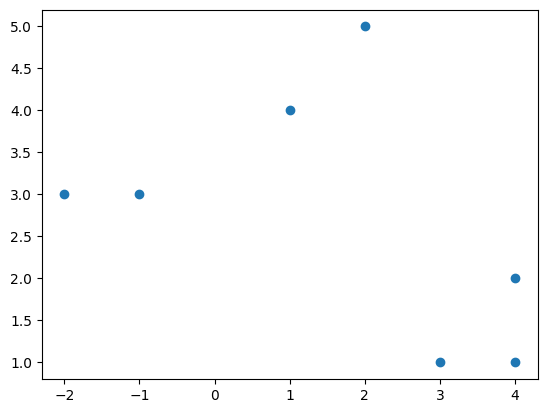

In [3]:
X_new = np.array([
                [2,5],
                [-1,3],
                [-2,3],
                [3,1],
                [1,4],
                [4,1],
                [4,2]
        ])
plt.scatter(X_new[:, 0], X_new[:, 1]);

In [ ]:
centroids = []
centroids.append(X_new[1])
centroids.append(X_new[-1])
centroids.append(X_new[0])
centroids

In [ ]:
dist_sq = np.array([[np.inner(c-x,c-x) for c in centroids] for x in X_new])
dist_sq

In [ ]:
np.sum(dist_sq, axis=0)

In [ ]:
random.choices(population, weights=None, *, cum_weights=None, k=1)